<a href="https://colab.research.google.com/github/seunghee-lee/option/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [1]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.8 MB/s eta 0:00:00


In [2]:
!pip install --upgrade yfinance

In [3]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [4]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-06-21'

In [5]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

/tmp/ipython-input-5-847437481.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [6]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-06-16,2946.659912,2947.070068,2886.129883,2903.500000,726400
2025-06-17,2950.300049,2998.620117,2925.790039,2959.929932,939600
2025-06-18,2972.189941,2979.320068,2933.629883,2933.629883,576500
2025-06-19,2977.739990,2996.040039,2954.469971,2989.560059,433300
2025-06-20,3021.840088,3022.060059,2972.370117,0.000000,484865


In [7]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-06-16,2903.50,2947.07,2886.13,2946.66,726351750,0.0180,1,52.04,14401114308029,2.410639e+15
2025-06-17,2959.93,2998.62,2925.79,2950.30,939594106,0.0012,1,3.64,17915934818024,2.414138e+15
2025-06-18,2933.63,2979.32,2933.63,2972.19,576548034,0.0074,1,21.89,14668323378767,2.432540e+15
2025-06-19,2989.56,2996.04,2954.47,2977.74,433310535,0.0019,1,5.55,13786565754695,2.436369e+15
2025-06-20,2986.52,3022.06,2972.37,3021.84,484864681,0.0148,1,44.10,17974844407806,2.471814e+15


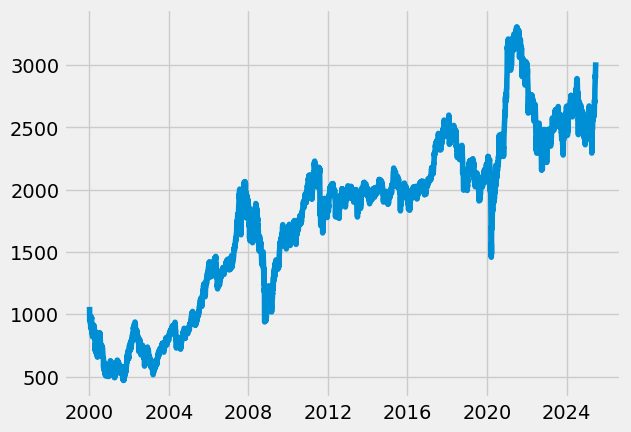

In [8]:
datag1=data1[['Close']]
plt.plot(datag1)

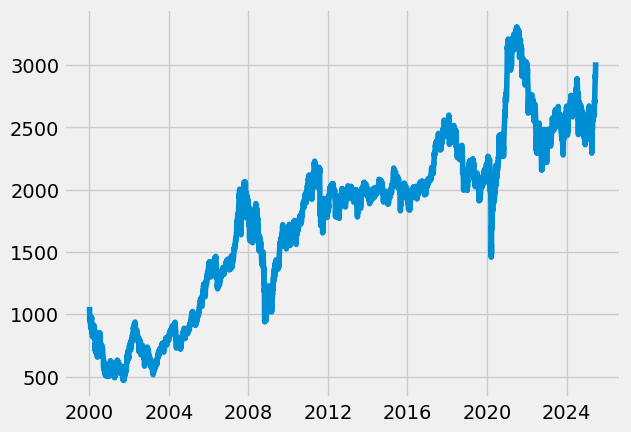

In [9]:
datag2=data2[['Close']]
plt.plot(datag2)

In [10]:
Kospi=data1

In [11]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [12]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-06-16,2946.659912,2947.070068,2886.129883,2903.500000,726400,0.017818
2025-06-17,2950.300049,2998.620117,2925.790039,2959.929932,939600,0.001235
2025-06-18,2972.189941,2979.320068,2933.629883,2933.629883,576500,0.007392
2025-06-19,2977.739990,2996.040039,2954.469971,2989.560059,433300,0.001866
2025-06-20,3021.840088,3022.060059,2972.370117,0.000000,484865,0.014701


In [ ]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

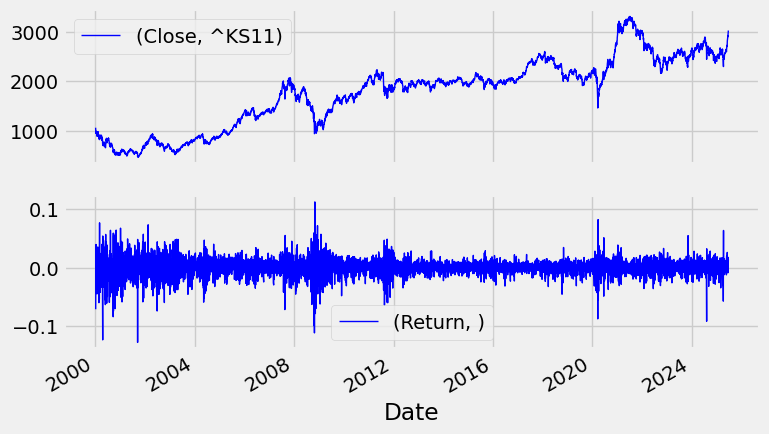

In [13]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [14]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [15]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-06-16,2946.659912,2639.454254,2598.189666
2025-06-17,2950.300049,2651.276508,2598.966250
2025-06-18,2972.189941,2664.395508,2599.694832
2025-06-19,2977.739990,2677.078760,2600.403624
2025-06-20,3021.840088,2690.539264,2601.393541


<Axes: xlabel='Date'>

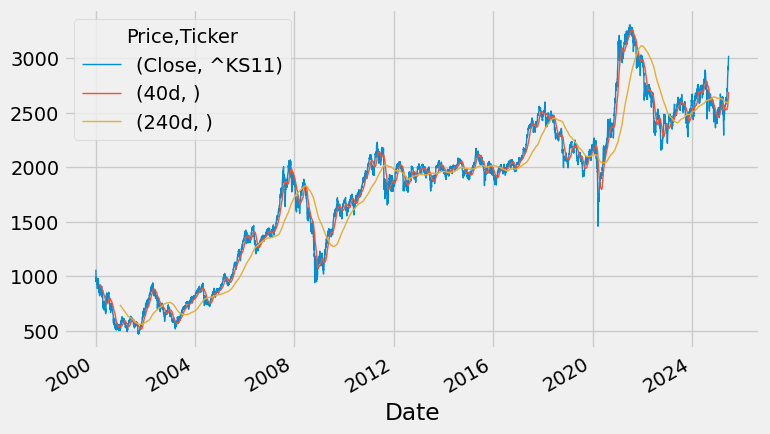

In [16]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [17]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

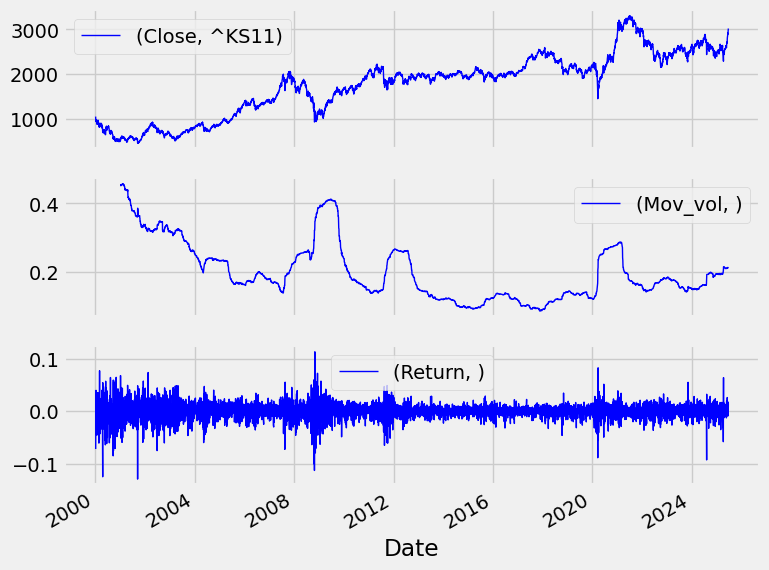

In [18]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))